In [1]:
from utils import *
from MySolution import *
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import json

fontsize = 22
dataset = 'mnist' # 'mnist' or 'syn'

In [2]:
# Prepare Dataset
if dataset == 'syn':
    data = prepare_synthetic_data()
elif dataset == 'mnist':
    data = prepare_mnist_data()
else:
    raise ValueError('Invalid dataset')

In [54]:
## Q1
### Task 1

# Define the sizes of the training dataset
data_portions = [0.001, 0.002, 0.0025, 0.005, 0.01, 0.1, 0.25, 0.5, 0.75, 1]
# data_portions = [0.001, 0.002, 0.0025, 0.005]
pca = PCA(n_components=0.97)

accuracy_list = []
for portion in data_portions:
    X_train = data['trainX'][:int(portion*len(data['trainX']))]
    X_pca = pca.fit_transform(X_train)
    Y_train = data['trainY'][:int(portion*len(data['trainY']))]
    X_test_pca = pca.transform(data['testX'])

    clf = MyClassifier()
    clf.train(X_pca, Y_train)
    # Y_pred = clf.predict(data['testX'])

    accuracy = clf.evaluate(X_test_pca, data['testY'])
    print(f"Classification accuracy for portion={portion}: {accuracy}")
    accuracy_list.append({'portion': portion, 'accuracy': accuracy})

print(accuracy_list)
result_t1 = accuracy_list

c:\Users\SamyakChakrabarty\OneDrive - UCLA IT Services\Documents\Personal\Grad\Fall24\236A\Project\ece236_project\.conda\Lib\site-packages\sklearn\decomposition\_pca.py:591: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


(1, 1)
Classification accuracy for portion=0.001: 0.372
(2, 1)
Classification accuracy for portion=0.002: 0.562
(2, 1)
Classification accuracy for portion=0.0025: 0.562
(5, 4)
Classification accuracy for portion=0.005: 0.652
(10, 8)
Classification accuracy for portion=0.01: 0.73
(100, 59)
Classification accuracy for portion=0.1: 0.876
(250, 102)
Classification accuracy for portion=0.25: 0.912
(500, 140)
Classification accuracy for portion=0.5: 0.894
(750, 160)
Classification accuracy for portion=0.75: 0.878
(1000, 174)
Classification accuracy for portion=1: 0.888
[{'portion': 0.001, 'accuracy': 0.372}, {'portion': 0.002, 'accuracy': 0.562}, {'portion': 0.0025, 'accuracy': 0.562}, {'portion': 0.005, 'accuracy': 0.652}, {'portion': 0.01, 'accuracy': 0.73}, {'portion': 0.1, 'accuracy': 0.876}, {'portion': 0.25, 'accuracy': 0.912}, {'portion': 0.5, 'accuracy': 0.894}, {'portion': 0.75, 'accuracy': 0.878}, {'portion': 1, 'accuracy': 0.888}]


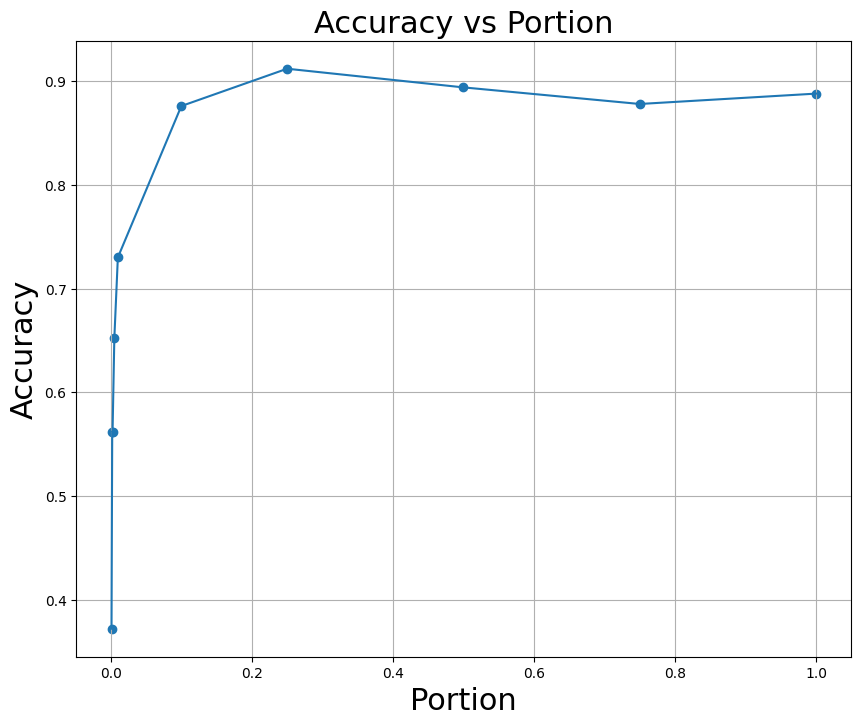

In [56]:
### T1 Plots
portions = [result['portion'] for result in result_t1]
accuracies = [result['accuracy'] for result in result_t1]

plt.figure(figsize=(10, 8))
plt.scatter(portions, accuracies)
plt.plot(portions, accuracies)
plt.xlabel('Portion', fontsize=fontsize)
plt.ylabel('Accuracy', fontsize=fontsize)
plt.title('Accuracy vs Portion', fontsize=fontsize)
plt.grid()
plt.savefig(f'accuracy_vs_portion_{dataset}_task1.png')
plt.show()

json.dump(result_t1, open(f'result_{dataset}_task1.json', 'w'))

In [5]:
### Task 2

# Define the sizes of the training dataset
data_portions = [0.001, 0.003, 0.005, 0.01, 0.1, 0.2, 0.5, 0.6, 0.7, 1]
K_list = [5, 10, 40]

# data_portions = [1]
# K_list = [2, 3, 5, 11, 20, 40]

result_list = []
for portion in data_portions:
    X_train = data['trainX'][:int(portion*len(data['trainX']))]
    Y_train = data['trainY'][:int(portion*len(data['trainY']))]
    Y_train = Y_train.astype(int)
    
    for K in K_list:
        if K > len(X_train):
            continue
        clustering_class = MyClustering(K)
        clustering_class.train(X_train)

        nmi = clustering_class.evaluate_clustering(Y_train)
        print(f"Clustering NMI for K={K} and portion={portion}: {float(nmi)}")

        accuracy = clustering_class.evaluate_classification(Y_train, data['testX'], data['testY'])
        print(f"Classification accuracy for K={K} and portion={portion}: {accuracy}")

        result_list.append({'portion': portion, 'k': K, 'nmi': float(nmi), 'accuracy': float(accuracy)})

print(result_list)
result_t2 = result_list

Number of components selected: 4
Explained variance covered: 1.00
Converged after 1 iterations.
Clustering NMI for K=5 and portion=0.005: 1.0
Classification accuracy for K=5 and portion=0.005: 0.646
Number of components selected: 8
Explained variance covered: 0.98
Converged after 2 iterations.
Clustering NMI for K=5 and portion=0.01: 1.0
Classification accuracy for K=5 and portion=0.01: 0.734
Number of components selected: 8
Explained variance covered: 0.98
Converged after 1 iterations.
Clustering NMI for K=10 and portion=0.01: 1.0
Classification accuracy for K=10 and portion=0.01: 0.74
Number of components selected: 48
Explained variance covered: 0.95
Converged after 6 iterations.
Clustering NMI for K=5 and portion=0.1: 0.4826188280197775
Classification accuracy for K=5 and portion=0.1: 0.738
Number of components selected: 48
Explained variance covered: 0.95
Converged after 5 iterations.
Clustering NMI for K=10 and portion=0.1: 0.6286148869083503
Classification accuracy for K=10 and p

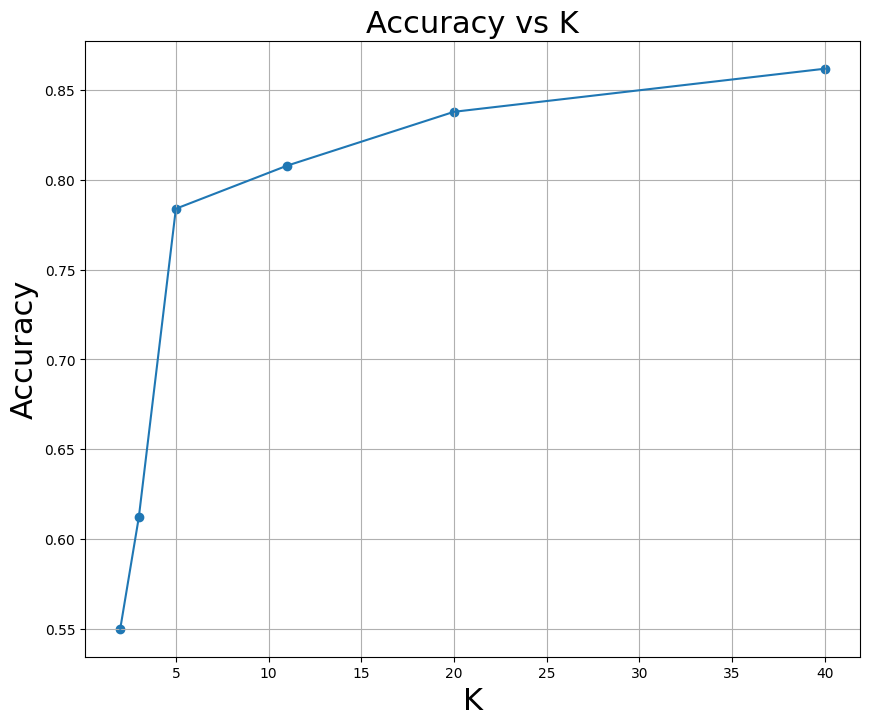

In [20]:
ks = [result['k'] for result in result_t2]
accuracies = [result['accuracy'] for result in result_t2]

plt.figure(figsize=(10, 8))
plt.scatter(ks, accuracies)
plt.plot(ks, accuracies)
plt.xlabel('K', fontsize=fontsize)
plt.ylabel('Accuracy', fontsize=fontsize)
plt.title('Accuracy vs K', fontsize=fontsize)
plt.grid()
plt.show()

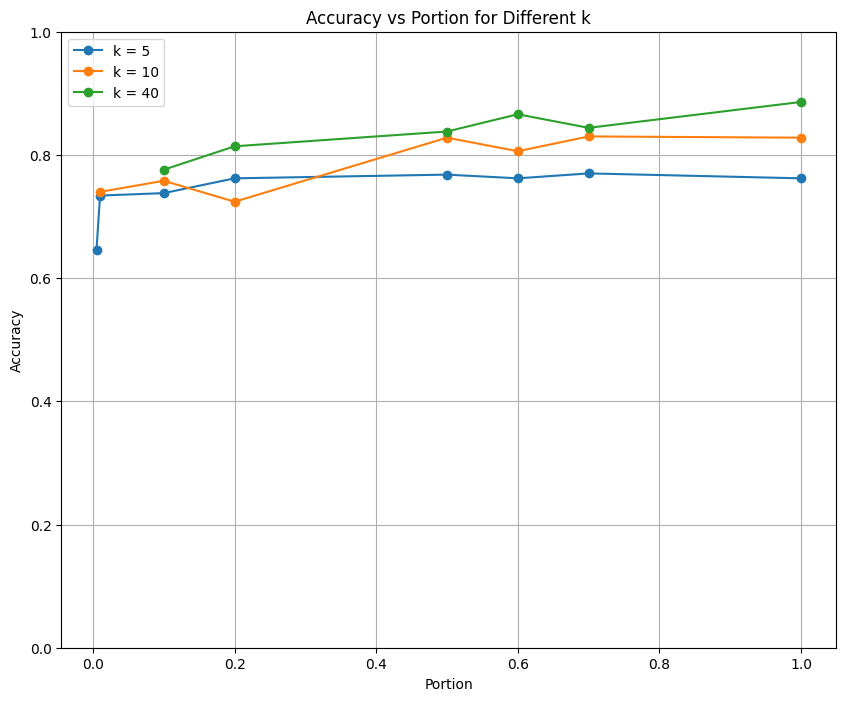

In [9]:
ks = sorted(set(d['k'] for d in result_t2))
plt.figure(figsize=(10, 8))

# Plot accuracy vs portion for each k
for k in ks:
    portions = [d['portion'] for d in result_t2 if d['k'] == k]
    accuracies = [d['accuracy'] for d in result_t2 if d['k'] == k]
    plt.plot(portions, accuracies, marker='o', label=f'k = {k}')

plt.xlabel('Portion')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Portion for Different k')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.savefig(f'accuracy_vs_portion_{dataset}_task2.png')
plt.show()

json.dump(result_t2, open(f'result_{dataset}_task2.json', 'w'))

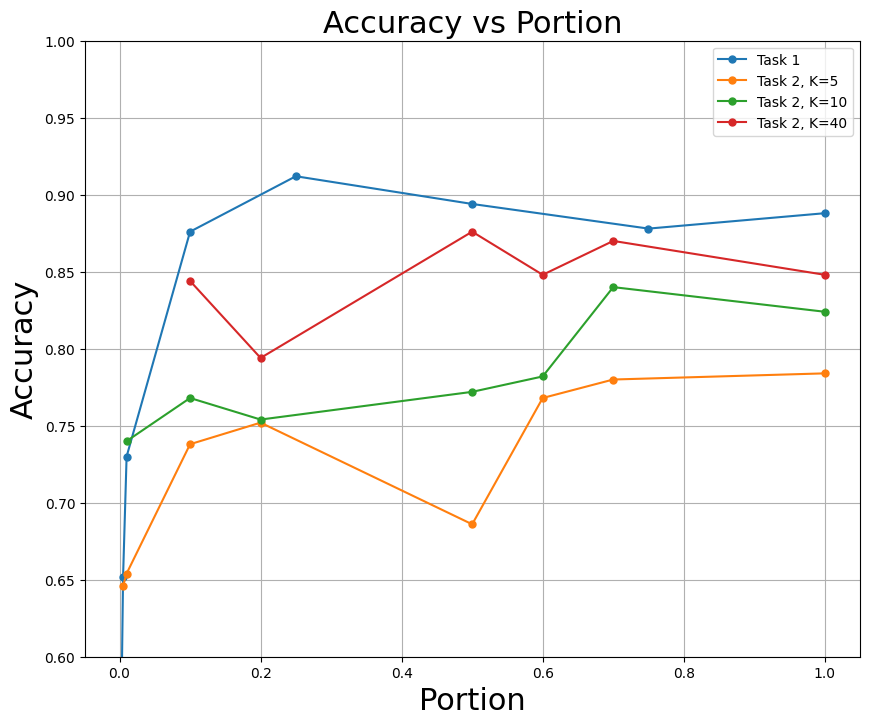

In [3]:
dataset = 'mnist'

data_a = json.load(open(fr"C:\Users\SamyakChakrabarty\OneDrive - UCLA IT Services\Documents\Personal\Grad\Fall24\236A\Project\ece236_project\bin\result_{dataset}_task1.json"))
data_b = json.load(open(fr"C:\Users\SamyakChakrabarty\OneDrive - UCLA IT Services\Documents\Personal\Grad\Fall24\236A\Project\ece236_project\bin\result_{dataset}_task2.json"))

portions_a = [d['portion'] for d in data_a]
accuracies_a = [d['accuracy'] for d in data_a]

portions_b = [d['portion'] for d in data_b if d['k'] == 5]
accuracies_b = [d['accuracy'] for d in data_b if d['k'] == 5]

portions_c = [d['portion'] for d in data_b if d['k'] == 10]
accuracies_c = [d['accuracy'] for d in data_b if d['k'] == 10]

portions_d = [d['portion'] for d in data_b if d['k'] == 40]
accuracies_d = [d['accuracy'] for d in data_b if d['k'] == 40]

plt.figure(figsize=(10, 8))
plt.plot(portions_a, accuracies_a, label='Task 1', marker='.', markersize=10)
plt.plot(portions_b, accuracies_b, label='Task 2, K=5', marker='.', markersize=10)
plt.plot(portions_c, accuracies_c, label='Task 2, K=10', marker='.', markersize=10)
plt.plot(portions_d, accuracies_d, label='Task 2, K=40', marker='.', markersize=10)
plt.xlabel('Portion', fontsize=fontsize)
plt.ylabel('Accuracy', fontsize=fontsize)
plt.title('Accuracy vs Portion', fontsize=fontsize)
plt.legend()
plt.ylim(0.6,1)
plt.grid()
plt.savefig(f'accuracy_vs_portion_{dataset}_combined.png')
plt.show()